In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from nltk.tokenize import RegexpTokenizer
import scipy.sparse as sp
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import math





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
#load the data file 
md_user = pd.read_csv("Data\md_user.csv")
md_user_test = pd.read_csv("Data\md_user_test.csv")
md_book = pd.read_csv("Data\md_book.csv")
A = md_user['user_id'].unique()
user_dict = { value: index for index, value in enumerate(A)}
book_arr = md_book.values[:,0]


In [ ]:

def get_items_test(book_arr, user_id,md_user):
  rate_matrix = md_user.values
  z = md_user.loc[md_user['user_id'] == user_id].values

  # z = z[0].astype(int)
  # print(z)
  book_id = z[:,0]
  # print(len(book_id))
  rate = z[:,2]
  # print(rate)
  book_index = []
  for i,x in enumerate(book_arr):
    if x in book_id:
      book_index.append(i)
    # else:
    #    print(x)
  # print(len(book_index))
  return book_index,rate
# book_index,rate = get_items_test(book_arr, 'f14eb7b97b91a036f392e8374ac1ba89',tmp_test)
# print(len(book_index))
# print(len(rate))

In [ ]:
def calCosin(md_book):
  # count = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0, stop_words='english')
  count = CountVectorizer(analyzer='word',ngram_range=(1,1),min_df=0, stop_words='english')
  count_matrix = count.fit_transform(md_book['soup'])
  # print(count_matrix)
  # print(count_matrix)
  cosine_sim = cosine_similarity(count_matrix, count_matrix)
  return cosine_sim
cosine_sim = calCosin(md_book)
print(cosine_sim)

[[1.         1.         0.96362411 ... 0.14285714 0.21821789 0.21821789]
 [1.         1.         0.96362411 ... 0.14285714 0.21821789 0.21821789]
 [0.96362411 0.96362411 1.         ... 0.14824986 0.1132277  0.1132277 ]
 ...
 [0.14285714 0.14285714 0.14824986 ... 1.         0.21821789 0.21821789]
 [0.21821789 0.21821789 0.1132277  ... 0.21821789 1.         0.33333333]
 [0.21821789 0.21821789 0.1132277  ... 0.21821789 0.33333333 1.        ]]


I build a small model (about 1000 users) for each alpha values

In [ ]:
train_1 = md_user[md_user['ids'].between(0, 999)]
test_1 = md_user_test[md_user_test['ids'].between(0, 999)]

In [ ]:
################################3test alpha
import time
def trainModuleForAlpha(trainset, md_book):
  user_ids = trainset['user_id'].unique()
  d = cosine_sim.shape[1]  # number of books
  n_users = len(user_ids)  # number of users
  
  count = 0
  model = []
  alpha_values = [0.01, 0.1, 1.0,2.0]
  for alpha_value in alpha_values:
    Weight = np.zeros((d, n_users))
    for k,n in enumerate(user_ids):
      print(k,'ID: ',n)
      user_id = n
      ids, scores = get_items_test(book_arr, user_id,trainset)
      clf = Ridge()
      clf.set_params(alpha=alpha_value)
      Xhat = cosine_sim[ids, :]
      clf.fit(Xhat, scores)
      a = clf.coef_
      b = clf.intercept_
      Yhat = cosine_sim.dot(a)+b
      Weight[:,k] = Yhat
    Weight = Weight.astype(np.float32)
    model.append(Weight)
  return model

start_time = time.time()
Weight = trainModuleForAlpha(train_1, md_book)
end_time = time.time()
# tra ve 4 mang chua 4 molel cua 1000 thang 
execution_time = end_time - start_time
print("Thời gian chạy:", execution_time, "giây")




0 ID:  d06d007d15b9a66fce35dcbc2ff789f0
1 ID:  f14eb7b97b91a036f392e8374ac1ba89
2 ID:  fc0dc60ed86f871c423adeb021552e54
3 ID:  cf29f77f0b7c4447af9d1c95bed228d6
4 ID:  20d986b7ec4f642f7b99aa5f9a246b64
5 ID:  203387cffa8cb057d9a964846dc7ca76
6 ID:  17ea8d8f7ad5d303fc66a657634a7586
7 ID:  8f02fe2ee22c380be2921f898d516cdb
8 ID:  b4d79f546e8385fbc6ba9069375ce750
9 ID:  6046d4d6d13078f055a5d5f4ed5c2512
10 ID:  dccec5703ceaf6fdec871457ede4e853
11 ID:  41bd39202589003ef23cc3e32f02e55b
12 ID:  1f9406656d36289f20af226656aa5467
13 ID:  64002e5f717d335e0c25e4b9c1ec42da
14 ID:  4c6f79c01bb3ba5a72c08e8420ac89e2
15 ID:  d8c8d71531dbf20f3c1753d918d9b33f
16 ID:  14cde81c48a9de507014bf845b10d36d
17 ID:  140ad053658a0f33ed0fc0aefc965958
18 ID:  fe141e395a08ed2389f417f03e43a732
19 ID:  175f7b34824d175f2f3713ca01c1c2c0
20 ID:  a65a05dbb52a61549ba8cafbf4936adb
21 ID:  a0bffa4491dd9b5d4a92aafc8b63ed17
22 ID:  dbcdaa226addcee94503de93400a64b4
23 ID:  77cdeac1f919000299d594be759f674e
24 ID:  6b0e3deb60da51866b

then I compute the RMSE for each alpha values to compare which is the best choice

In [ ]:
def computeRMSEForAlpha(trainset,model,md_book):
  RMSE_list = []
  for i in range(len(model)):
    model_test = model[i]
    se = 0
    cnt = 0
    n_user = len(trainset['user_id'].unique())
    user_ids = trainset['user_id'].unique()
    for n in range(n_user):
      id = user_ids[n]
      print('number: ',n,'posit: ',user_dict[id],'ID:',id)
      ids, scores_truth = get_items_test(book_arr, id,md_user)
      position = user_dict[id] #sau bo 10000
      scores_pred = model_test[ids, position]
      e = scores_truth - scores_pred
      se += (e*e).sum(axis = 0)
      cnt += e.size 
      print('RMSE now: ',np.sqrt(se/cnt),'\n')
    # if(n==100):
    a = np.sqrt(se/cnt)
    RMSE_list.append(a)
    #   break
  return RMSE_list

#sau thay Weight thanh module to va bo -10000
#computeRMSE(train_2,part2,md_book)


In [ ]:
RMSE_train = computeRMSEForAlpha(train_1,Weight,md_book)
RMSE_test = computeRMSEForAlpha(test_1,Weight,md_book)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
RMSE now:  0.48728626593679203 

number:  26 posit:  460 ID: 19b461e3cf3388412aadcc8d6ffb2b4a
RMSE now:  0.505745888267705 

number:  27 posit:  576 ID: 67f28383955f712c325f7e3b7bb3c90e
RMSE now:  0.5005534889191326 

number:  28 posit:  566 ID: ef7b2f65730bdd1883f46dcecfee3e05
RMSE now:  0.5372757149644838 

number:  29 posit:  176 ID: bb70d3c2dc9ef9b0d5634f6f7b976f12
RMSE now:  0.5520620893892557 

number:  30 posit:  568 ID: fb285b8ffd211c5e1b0b02fd3c5c49f9
RMSE now:  0.5486757847510172 

number:  31 posit:  840 ID: 95c215eb95f65aed47b9cc2928a31085
RMSE now:  0.5466061623555557 

number:  32 posit:  439 ID: af538fe5f6aba0a0656d1d6a0454b184
RMSE now:  0.5438030362997734 

number:  33 posit:  642 ID: 2291ce4e0205a26a31ac793322c821e5
RMSE now:  0.5433648464142465 

number:  34 posit:  8 ID: b4d79f546e8385fbc6ba9069375ce750
RMSE now:  0.5421293603781404 

number:  35 posit:  595 ID: a01b0bc226e19047be99dcd2dd11190b
RMSE now:  0.53

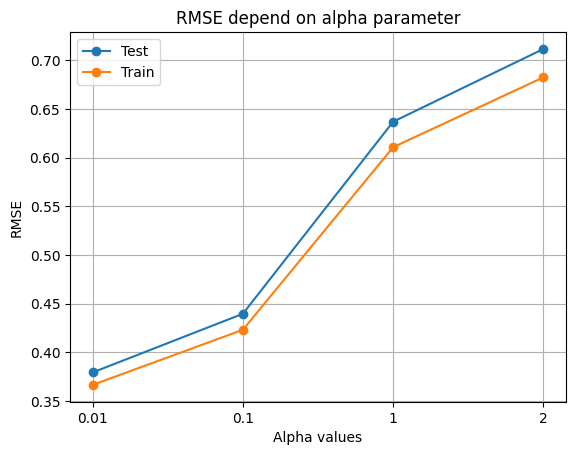

In [ ]:
labels = ['Test', 'Train']

plt.plot( RMSE_test, marker='o', label=labels[0])
plt.plot( RMSE_train, marker='o', label=labels[1])

x_labels = ['0.01', '0.1', '1', '2']
plt.xticks(range(len(x_labels)), x_labels)
plt.xlabel('Alpha values')
plt.ylabel('RMSE')
plt.title('RMSE depend on alpha parameter')

plt.legend()
plt.grid(True)

plt.show()

Now i build a model for all users with alpha = 0.01

In [ ]:
import time

def trainModule(trainset, md_book):
  user_ids = trainset['user_id'].unique()
  d = cosine_sim.shape[1]  # number of books
  n_users = len(user_ids)  # number of users
  Weight = np.zeros((d, n_users))
  count = 0
  for k,n in enumerate(user_ids):
    print(k,'ID: ',n)
    user_id = n
    ids, scores = get_items_test(book_arr, user_id,trainset)
    print('ids: ',ids)
    print(scores)
    clf = Ridge(alpha=0.01, fit_intercept=True)
    Xhat = cosine_sim[ids, :]
    print('Xhat:',Xhat[:,0:10])
    clf.fit(Xhat, scores)
    # print(clf[0:10])
    a = clf.coef_
    print('a: ',a[0:10])
    b = clf.intercept_
    print(b)
    Yhat = cosine_sim.dot(a)+b
    print(Yhat[0:10])
    Weight[:,k] = Yhat

  return Weight

start = time.time()
trainModule(md_user, md_book)
end = time.time()
process = end - start
print('time: ',process)





In [ ]:

train_1 = md_user[md_user['ids'].between(0, 9999)]
train_2 = md_user[md_user['ids'].between(10000, 19999)]
train_3 = md_user[md_user['ids'] >= 20000]


test_1 = md_user_test[md_user_test['ids'].between(0, 9999)]
test_2 = md_user_test[md_user_test['ids'].between(10000, 19999)]
test_3 = md_user_test[md_user_test['ids'] >= 20000]

Due to the RAM overflow I have to devide the User_rate dataset into 3 part to train then iI merge these matrix and save to the npx file for further using

In [ ]:
Weight1 = trainModule(train_1, md_book)
Weight1 = Weight1.astype(np.float32)
np.savez('/content/drive/MyDrive/ML/TrainMatrix10000.npz',Weight=Weight)

Weight2 = trainModule(train_2, md_book)
Weight2 = Weight2.astype(np.float32)
np.savez('/content/drive/MyDrive/ML/TrainMatrix20000.npz',Weight=Weight)

Weight3 = trainModule(train_3, md_book)
Weight3 = Weight3.astype(np.float32)
np.savez('/content/drive/MyDrive/ML/TrainMatrix30000.npz',Weight=Weight)

#merge the 3 part
Weight1 = np.concatenate((Weight1, Weight2), axis=1)
Weight1 = np.concatenate((Weight1, Weight3), axis=1)
np.savez('/content/drive/MyDrive/ML/TrainFinalMatrix.npz',Weight = Weight1)

Here I load the model matrix from google drive then I compute the RMSE of the training and testing set using this model

In [ ]:
source = np.load('/content/drive/MyDrive/ML/TrainFinalMatrix.npz')
model = source['Weight']

#RMSE compute
#trainset la user_rate hoac user_rate_test


Here I compute the RMSE for each user base on their rate and the number of books

In [ ]:



def computeRMSEForEachPersion(trainset,model,md_book):
  
  n_user = len(trainset['user_id'].unique())
  user_ids = trainset['user_id'].unique()
  err_matrix = np.zeros((2, n_user))
  for n in range(n_user):

    id = user_ids[n]
    print('number: ',n,'posit: ',user_dict[id],'ID:',id)
    ids, scores_truth = get_items_test(book_arr, id,md_user)
    position = user_dict[id] #sau bo 10000
    scores_pred = model[ids, position]
    e = scores_truth - scores_pred
    se = (e*e).sum(axis = 0)
    # cnt += e.size 
    RMSE = np.sqrt(se/len(ids))
    print('id:',id,'RMSE now: ',RMSE,'\n')
    err_matrix[0,n] = len(ids)
    err_matrix[1,n] = RMSE
  return err_matrix
err_matrix = computeRMSEForEachPersion(md_user_test,model,md_book)
  
  # a = np.sqrt(se/cnt)
  # return a

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
id: 4d36448229a8de51fa9b118c65bdd5e7 RMSE now:  0.5773522838849677 

number:  8692 posit:  26396 ID: 7f76ceeda1705388ce497b959c20fb91
id: 7f76ceeda1705388ce497b959c20fb91 RMSE now:  0.21327309446845819 

number:  8693 posit:  22731 ID: 22bb28c897b77ae3ad275893921fca14
id: 22bb28c897b77ae3ad275893921fca14 RMSE now:  0.00016235675043319942 

number:  8694 posit:  22476 ID: cfe555a432e1e9d63874c7f0535b2a73
id: cfe555a432e1e9d63874c7f0535b2a73 RMSE now:  0.009907885713310645 

number:  8695 posit:  14773 ID: 814804b5a9ea3d22b8f3882fde239c11
id: 814804b5a9ea3d22b8f3882fde239c11 RMSE now:  0.006130027164750351 

number:  8696 posit:  2258 ID: 230130b7d9e8d08bafe96276f060ec72
id: 230130b7d9e8d08bafe96276f060ec72 RMSE now:  0.004111813348351439 

number:  8697 posit:  10716 ID: 9b2fb9de72a7579c031d45adb681abfc
id: 9b2fb9de72a7579c031d45adb681abfc RMSE now:  0.000687208718708985 

number:  8698 posit:  8660 ID: aa3acff111a85f637832e189714

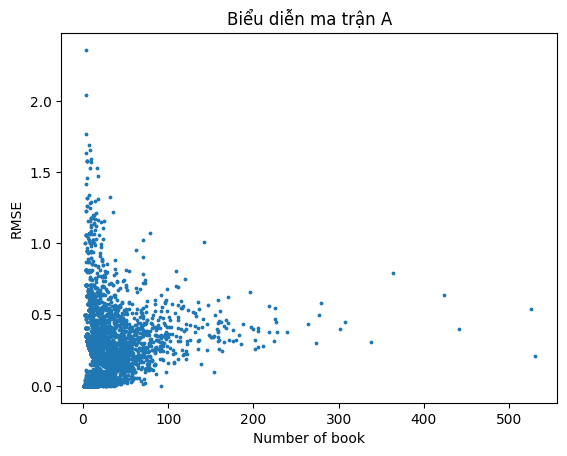

In [ ]:
def plot_matrix(A):
    n = A.shape[1]  # Số cột của ma trận A
    x = A[0, :]    # Giá trị hàng 1
    y = A[1, :]    # Giá trị hàng 2

    plt.scatter(x, y, s=3)
    plt.xlabel('Number of book')
    plt.ylabel('RMSE')
    plt.title('Biểu diễn ma trận A')
    plt.show()

# Ví dụ sử dụng

plot_matrix(err_matrix)

Here is the RMSE for whole system


In [ ]:
def computeRMSE(trainset,model,md_book):
  se = 0
  cnt = 0
  n_user = len(trainset['user_id'].unique())
  user_ids = trainset['user_id'].unique()
  for n in range(n_user):
    id = user_ids[n]
    print('number: ',n,'posit: ',user_dict[id],'ID:',id)
    ids, scores_truth = get_items_test(book_arr, id,md_user)
    position = user_dict[id] #sau bo 10000
    scores_pred = model[ids, position]
    e = scores_truth - scores_pred
    se += (e*e).sum(axis = 0)
    cnt += e.size 
    print('RMSE now: ',np.sqrt(se/cnt),'\n')
    # if(n==100):
    #   break
  
  a = np.sqrt(se/cnt)
  return a

#sau thay Weight thanh module to va bo -10000
#computeRMSE(train_2,part2,md_book)


Compute the RMSE 



In [ ]:
computeRMSE(md_user,model,md_book)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
RMSE now:  0.27503512427180754 

number:  34014 posit:  34014 ID: 54a2c773628105110cc99f533aecf0b5
RMSE now:  0.2750344815665174 

number:  34015 posit:  34015 ID: 9648205ff227c5f9989212163e5aa4c3
RMSE now:  0.2750338388657329 

number:  34016 posit:  34016 ID: 1576562ec8782ccde58a02af7b7bb162
RMSE now:  0.2750325534776821 

number:  34017 posit:  34017 ID: 0090d57681c3f3300dae529cfd3f002a
RMSE now:  0.27503191079041417 

number:  34018 posit:  34018 ID: 2162872e11226004c9e38a1bc391a406
RMSE now:  0.2750312681076516 

number:  34019 posit:  34019 ID: b31d46b59a83e2481a1260999fa92682
RMSE now:  0.27503062542939444 

number:  34020 posit:  34020 ID: 9773552e8eee5ca5cc25252920fb1dc9
RMSE now:  0.27502998275564255 

number:  34021 posit:  34021 ID: 184a2084d830ac9a987290026d269bb9
RMSE now:  0.2750293400863959 

number:  34022 posit:  34022 ID: 02748534b86ed84789ca566e4261abc1
RMSE now:  0.27502869742165453 

number:  34023 posit:  3

0.2743113926757837

Compute the RMSE with the training set

We have the result RMSE is 0.2743113926757837

Now we compute the RMSE of the testing set 
After calculate the result is 0.30289145949019036

In [ ]:
computeRMSE(md_user_test,model,md_book)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
RMSE now:  0.30684298113561026 

number:  10266 posit:  7523 ID: 21ded7520cb590856dedd2f1b604e0dd
RMSE now:  0.30684193959000355 

number:  10267 posit:  18 ID: fe141e395a08ed2389f417f03e43a732
RMSE now:  0.30683777351403285 

number:  10268 posit:  611 ID: a1f76a769a1cffb3a60b80459e1680b9
RMSE now:  0.3068432842535761 

number:  10269 posit:  17376 ID: 266181ad3fa6a3134ad9a5d4761f5fbe
RMSE now:  0.30684224285540695 

number:  10270 posit:  11836 ID: e4ed6601d541f7455908c3e4f6886c95
RMSE now:  0.30683391713177577 

number:  10271 posit:  12903 ID: 81711dd535954d0bc2d6ad2bd31d4569
RMSE now:  0.3068318345491216 

number:  10272 posit:  5754 ID: 3ade475b4e89b049821d21f1f9d8bca4
RMSE now:  0.3068266282483813 

number:  10273 posit:  25846 ID: 3a74055e4b2d9c654abd49c09de5f173
RMSE now:  0.3068255870198238 

number:  10274 posit:  32042 ID: 33b2e90b50201deef868088c290b7096
RMSE now:  0.30682454580186663 

number:  10275 posit:  1220 ID

0.30289145949019036